Preprocess Impressionist Painting Dataset from Kaggle

Dataset downloaded to: /Users/paolabarrios/.cache/kagglehub/datasets/annieq0723/paintings/versions/1
Found 5000 images in the dataset
Processing 4000 training images...


100%|██████████| 4000/4000 [01:05<00:00, 61.22it/s]


Processing 1000 test images...


100%|██████████| 1000/1000 [00:16<00:00, 61.43it/s]


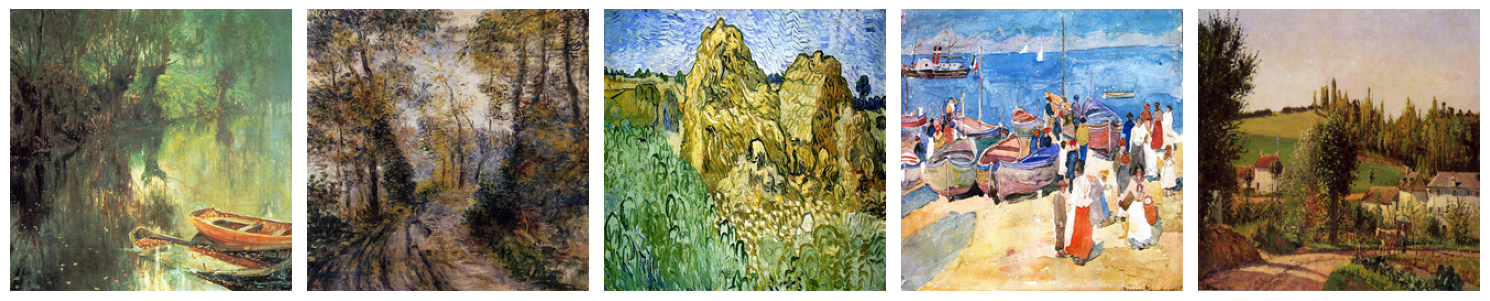

Preprocessing art complete. Images saved to preprocessed_paintings.
Train images: 4000
Test images: 1000


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import kagglehub
import shutil
from pathlib import Path
import random
from tqdm import tqdm

path = kagglehub.dataset_download("annieq0723/paintings")
print(f"Dataset downloaded to: {path}")

# Directories for preprocessed images
output_dir = "preprocessed_paintings"
os.makedirs(output_dir, exist_ok=True)
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Preprocess and resize images
def preprocess_image(image_path, target_size=(256, 256)):
    img = Image.open(image_path)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.LANCZOS)
    img_array = np.array(img)
        
    return img_array, True

# Display sample images
def display_sample_images(images, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(min(num_samples, len(images))):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# How many images?
image_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_files.append(os.path.join(root, file))

print(f"Found {len(image_files)} images in the dataset")

# Process images and split into train/test sets
processed_images = []
random.shuffle(image_files)  # Shuffle for random train/test split

#80% train, 20% test
train_split = int(0.8 * len(image_files))
train_files = image_files[:train_split]
test_files = image_files[train_split:]

print(f"Processing {len(train_files)} training images...")
for i, img_path in enumerate(tqdm(train_files)):
    img_array, success = preprocess_image(img_path)
    if success:
        output_filename = f"painting_{i:04d}.jpg"
        output_path = os.path.join(train_dir, output_filename)
        Image.fromarray(img_array).save(output_path)
    
        if i < 10:
            processed_images.append(img_array)

print(f"Processing {len(test_files)} test images...")
for i, img_path in enumerate(tqdm(test_files)):
    img_array, success = preprocess_image(img_path)
    if success:
        output_filename = f"painting_{i:04d}.jpg"
        output_path = os.path.join(test_dir, output_filename)
        Image.fromarray(img_array).save(output_path)

if processed_images:
    display_sample_images(processed_images)

print(f"Preprocessing art complete. Images saved to {output_dir}.")

# Data distribution
train_count = len(os.listdir(train_dir))
test_count = len(os.listdir(test_dir))
print(f"Train images: {train_count}")
print(f"Test images: {test_count}")